<div style="display: flex; justify-content: space-between; align-items: center; border-bottom: 2px solid black; padding-bottom: 1em; font-family: 'Courier New', Courier, monospace;">
    <h3 style="margin-top: 1em;">Calc/Analytic Geom II</h3>
    <h3 style="text-align: center;">Computer Lab #1</h3>
    <h3 style="justify-content: center; margin-right: 2em;">Simon Hamilton</h3>
</div>

<img src="https://t4.ftcdn.net/jpg/00/34/64/97/360_F_34649707_uoKRAztDr20o975ncHrXpXASexOc57Yp.jpg" 
     alt="Calc_Image" 
     style="float: right; border: 2px solid black; width: 500px; height: 300px; margin-left: 1em; margin-right: 5em; margin-top: -2em;">

<p style="font-size: 1em; overflow-wrap: normal; font-family: 'Courier New', Courier, monospace;">
  This programming assignment will cover topics of graphing and computation of functions, and integrals. This will be done in Python, and some inline Mathematica. The first question asks to set <math><msup><mi>a</mi></msup></math> equal to the last digit of my student ID which is 6, and plug it into the function:
</p>

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mfrac>
    <mn>1</mn>
    <msqrt>
      <mrow>
        <mi>a</mi><mi>x</mi><mo>+</mo><mn>1</mn>
      </mrow>
    </msqrt>
  </mfrac>
</math>

<p style="font-size: 1em; overflow-wrap: normal; font-family: 'Courier New', Courier, monospace;">
  We're asked to graph the function from 0 to 1, make an estimate of the AUC, and calculate the AUC in Mathematica.
  These question requirements are common in Data Science in Enterprise/Business environments as they can be used to
  analyze large amounts of data and visualize it through EDA (Exploratory Data Analysis) methods.
</p>



<div>
    <p style="border-top: 2px solid black; padding-top: 2em; font-family: 'Courier New', Courier, monospace;">
    For the first subquestion, I will graph the given function from 0 to 1. This can simply be done in Python.
    No comments have been added as the code is self explanitory.</p>
</div>

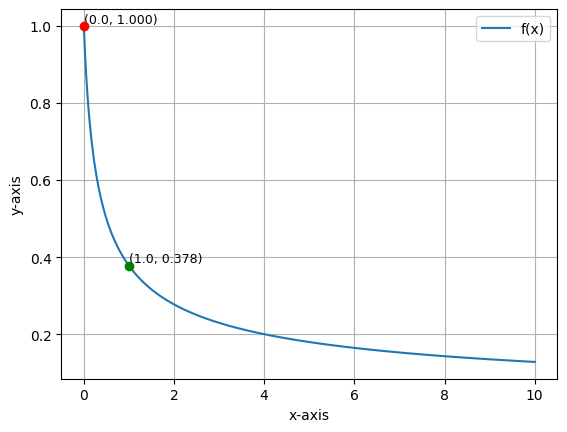

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import *

a = 6

def f(x):
    return 1 / np.sqrt(a * x + 1)

x = np.linspace(0, 10, 400)
y = f(x)

bounds = [0, 1]
colors = ["red", "green"]

plt.plot(x, y, label="f(x)")

for i in range(len(bounds)):
    xi = bounds[i]
    yi = f(xi)
    plt.scatter(xi, yi, color=colors[i], zorder=5)
    plt.text(xi, yi, f'({xi:.1f}, {yi:.3f})', fontsize=9, ha="left", va="bottom")

plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.grid(True)
plt.legend()
plt.show()

<div>
    <p style="font-family: 'Courier New', Courier, monospace; margin-top: 2em;">
        Here I am graphing our function and displaying the AUC as shown by the shaded area.
    </p>
</div>

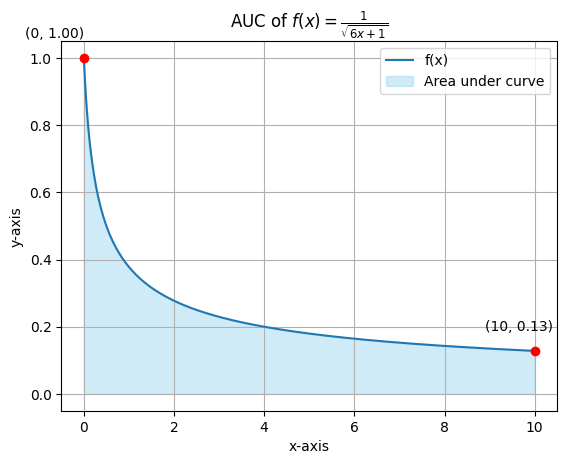

In [23]:
plt.plot(x, y, label="f(x)")

plt.fill_between(x, y, color="skyblue", alpha=0.4, label="Area under curve")

plt.scatter([0, 10], [f(0), f(10)], color="red", zorder=5)
plt.text(0, f(0) + 0.05, f"(0, {f(0):.2f})", ha="right", va="bottom")
plt.text(8.9, f(10) + 0.05, f"(10, {f(10):.2f})", ha="left", va="bottom")

plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.title(r"AUC of $f(x) = \frac{1}{\sqrt{6x + 1}}$")
plt.legend()
plt.grid(True)
plt.show()

<div>
    <p style="font-family: 'Courier New', Courier, monospace; margin-top: 2em;">Here is an additional way to graph the AUC of our function using a very common Machine Learning package scikit-learn. This package has a built in AUC metric that we can call to compute this area. Once computed we can simply graph it with pyplot.</p>
</div>

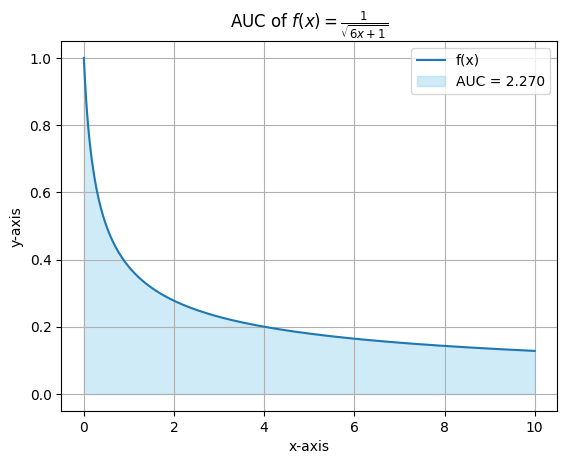

In [24]:
from sklearn.metrics import auc
area = auc(x, y)
plt.plot(x, y, label="f(x)")
plt.fill_between(x, y, color="skyblue", alpha=0.4, label=f"AUC = {area:.3f}")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.title(r"AUC of $f(x) = \frac{1}{\sqrt{6x + 1}}$")
plt.legend()
plt.grid(True)
plt.show()

<div>
    <p style="font-family: 'Courier New', Courier, monospace; margin-top: 2em;">This section is the last subquestion for the first question. It asks to calculate the AUC in Mathematica. This posed to be more challenging for odd reasons. I was able to set up a cloud deployment through the Wolfram|Alpha Developers Portal which allows for API key creation. Once I created this API key, I imported the requests package (a Python package that handles outside requests over ports 80/443) and attempted to connect to the cloud environment using my API key. This failed. Since the error displayed was for an SSLCertVerificationError, I found that the corporate proxy I'm connected to was injecting a self signed certificate into all HTTPS requests, essentially overwritting my WolframAlpha certificate. To try and get around this, I created an instance of a Mozilla signed cert and called it locally. This also failed for the same reason. As a test <span style="color: red;">(I DO NOT RECOMMEND OR CONDONE THIS!!!)</span> I ran the GET request unencrypted inside a virtual machine (VM) by setting the verify argument to False. I left the ouput for this as the one from the test as I am to lazy to boot up a separate machine just to run this in an encrypted tunnel. Comments are added to show the Mathematica, but the rest is again very self explanitory.</p>
</div>

c:\Users\simon.hamilton\AppData\Local\Programs\Python\Python313\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.wolframalpha.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


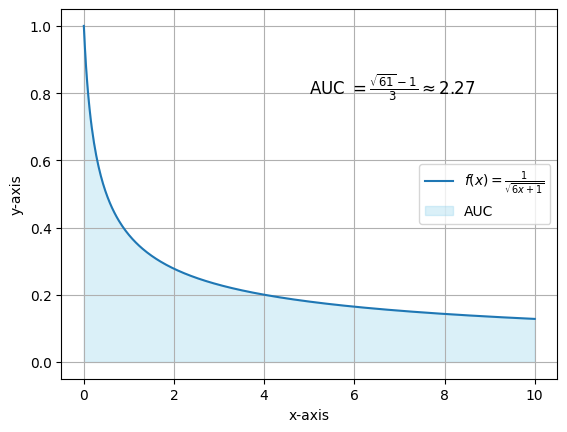

In [ ]:
import requests

#   API key not shown because I may be an idiot but I'm not THAT idiotic
API_KEY = "*************"

#   this is the inline Mathematica that is sent to WolframAlpha to get computed
expr = "Integrate[1/Sqrt[6 x + 1], {x, 0, 10}]"

url = "https://api.wolframalpha.com/v2/query"
params = {
    "input": expr,
    "appid": API_KEY,
    "output": "JSON",
    "format": "plaintext"
}

res = requests.get(url, params=params, verify=False).json()

pods = res["queryresult"]["pods"]
results = [p["subpods"][0]["plaintext"] for p in pods]

f = lambda x: 1/np.sqrt(6*x+1)
y = f(x)
plt.plot(x, y, label=r"$f(x) = \frac{1}{\sqrt{6x+1}}$")

plt.fill_between(x, y, alpha=0.3, color="skyblue", label="AUC")

plt.text(5, 0.8, r"AUC $= \frac{\sqrt{61}-1}{3} \approx 2.27$", fontsize=12)

plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.legend()
plt.grid(True)
plt.show()


<div>
    <p style="border-top: 2px solid black; padding-top: 2em; font-family: 'Courier New', Courier, monospace;">
    The second question asks to consider the functions, where <math><msup><mi>a</mi></msup></math> is as defined above,
    </p>
</div>
<style>
    .equation-container {
        display: flex;
        justify-content: center;
        gap: 3em;
        align-items: center;
        font-size: 1.35em;
    }
    .and-text {
        margin: 0 0.5em;
        font-family: 'Courier New', Courier, monospace;
        font-size: 0.9em;
    }
    .second-section {
        font-family: 'Courier New', Courier, monospace;
    }
</style>
<div class="equation-container">
  <math xmlns="http://www.w3.org/1998/Math/MathML">
    <mi>y</mi>
    <mo>=</mo>
    <msup>
      <mi>e</mi>
      <mi>x</mi>
    </msup>
  </math>

  <span class="and-text">and</span>

  <math xmlns="http://www.w3.org/1998/Math/MathML">
    <mi>y</mi>
    <mo>=</mo>
    <msqrt>
      <mrow>
        <mi>a</mi><mi>x</mi>
      </mrow>
    </msqrt>
    <mo>+</mo>
    <mn>1</mn>
  </math>
</div>

<div class="second-section">
<p>
The first subquestion asks for both these functions to be graphed on the same coordinate axis. I will do this in the way I've done it before. With pyplot! Yipee!
</p>
<p>
I am combining the answers to the other subquestions into this graph as this will decrease the need for a million different graphs. Anyways, the second subquestion asks to find the points of intersection using the numerical solver and manual inspection of the graph. I was able to complete this using Python and my eyeballs to see the graph.
</p>
</div>

Intersection Points
  x1 = 0.0000, y1 = 1.0000
  x2 = 1.3459, y2 = 3.8418

AUC Between Intersections
  Under y = e^x          : 2.8418
  Under y = sqrt(6*x)+1 : 3.8958
  Difference (e^x - sqrt(6x)+1) : -1.0540



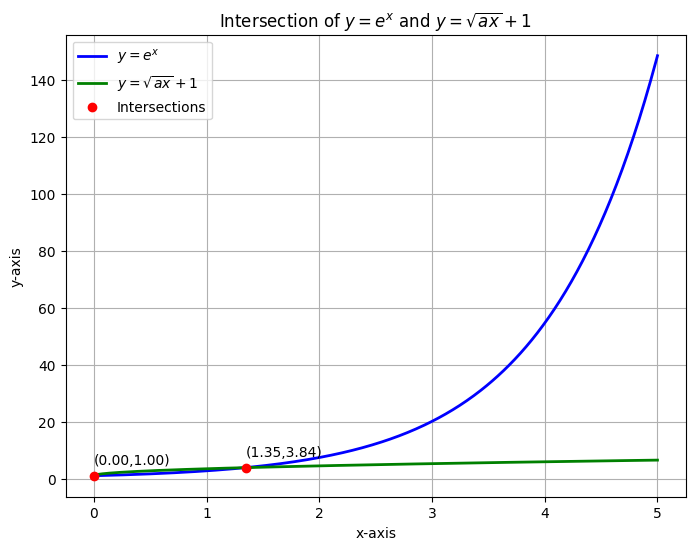

In [100]:
from scipy.optimize import fsolve
from scipy.integrate import quad

a = 6 # redefining as Python uses static scoping mixed with mutable vars i.e. I somehow redefined this somewhere ¯\_(ツ)_/¯
func_01 = lambda x: np.exp(x)
func_02 = lambda x: np.sqrt(a*x) + 1

def intersection(x):
    return func_01(x) - func_02(x)

# I visually inspected the graph and came to this conclusion for the initial guess of the intersections.
init_x_guesstimate = [0, 1.3]

# I'm using fsolve here because it can do the required computations for me.
x_intersections = [fsolve(intersection, x0)[0] for x0 in init_x_guesstimate]
y_intersections = [func_01(xi) for xi in x_intersections]

x_start, x_end = x_intersections
auc_func01, _ = quad(func_01, x_start, x_end)
auc_func02, _ = quad(func_02, x_start, x_end)


x = np.linspace(0, 5, 400)
plt.figure(figsize=(8,6))
plt.plot(x, func_01(x), label=r"$y=e^x$", color="blue", linewidth=2)
plt.plot(x, func_02(x), label=r"$y=\sqrt{ax}+1$", color="green", linewidth=2)
plt.scatter(x_intersections, y_intersections, color="red", zorder=5, label="Intersections")

for xi, yi in zip(x_intersections, y_intersections):
    y_offset = 3
    plt.text(xi, yi + y_offset, f"({xi:.2f},{yi:.2f})", fontsize=10, ha="left", va="bottom")

# Here I'm just using a simple list to print everything at once instead of having a gajillion print statements

report_lines = [
    "Intersection Points",
    f"  x1 = {x_intersections[0]:.4f}, y1 = {y_intersections[0]:.4f}",
    f"  x2 = {x_intersections[1]:.4f}, y2 = {y_intersections[1]:.4f}",
    "",
    "AUC Between Intersections",
    f"  Under y = e^x          : {auc_func01:.4f}",
    f"  Under y = sqrt({a}*x)+1 : {auc_func02:.4f}",
    f"  Difference (e^x - sqrt({a}x)+1) : {auc_func01 - auc_func02:.4f}",
    "",
]

print("\n".join(report_lines))

plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.title(r"Intersection of $y=e^x$ and $y=\sqrt{ax}+1$")
plt.grid(True)
plt.legend()
plt.show()
